In [2]:
import pandas as pd

JohannDF = pd.read_json("datensets/schein-datenset.json")

In [3]:
#Verteilungen finden bei 5 Stimmen
import itertools

#v = [0, 1, 2, 3]
#permV = list(itertools.permutations(v, r=3))
#print(permV)
overViewJ = {}
overViewJPie = {}
overViewJScatter = {}

verteilungenJ = JohannDF[(JohannDF["StimmenZahl"] == 5) & (JohannDF["TrigaKlasse"] == "TP")]
print("Anzahl der Akkorde:", len(verteilungenJ))
for index, chord in verteilungenJ.iterrows():
    #print(chord)
    b = chord["b"]
    m = chord["m"]
    s =  chord["s"]
    dauer = chord["Dauer"]
    anzahl = chord["Anzahl"]
    vertListe = [b, m, s]
    if str(vertListe) in overViewJ:
        overViewJ[str(vertListe)][0] += anzahl
        overViewJ[str(vertListe)][1] += dauer
    else:
        overViewJ[str(vertListe)] = [anzahl, dauer]

print(overViewJ)

for key, val in overViewJ.items():
    overViewJPie[key] = overViewJ[key][1]# / overViewJ[key][0]

sortedOverViewJPie = dict(sorted(overViewJPie.items()))
sortedOverViewJPie

Anzahl der Akkorde: 201
{'[1.0, 1.0, 3.0]': [62, 55.5], '[2.0, 2.0, 1.0]': [257, 297.1875], '[2.0, 1.0, 2.0]': [563, 930.75], '[3.0, 1.0, 1.0]': [592, 1158.5], '[1.0, 2.0, 2.0]': [126, 107.0], '[1.0, 3.0, 1.0]': [41, 35.5]}


{'[1.0, 1.0, 3.0]': 55.5,
 '[1.0, 2.0, 2.0]': 107.0,
 '[1.0, 3.0, 1.0]': 35.5,
 '[2.0, 1.0, 2.0]': 930.75,
 '[2.0, 2.0, 1.0]': 297.1875,
 '[3.0, 1.0, 1.0]': 1158.5}

['1-1-3', '2-2-1', '2-1-2', '3-1-1', '1-2-2', '1-3-1']


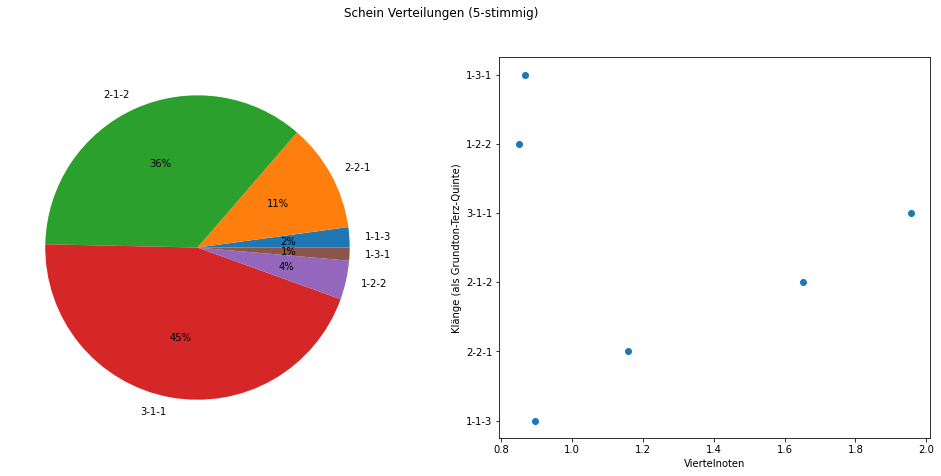

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Jlabels = [label for label in overViewJPie]
myJlabels = []
for item in Jlabels:
    item = item.replace("[", "")
    item = item.replace("]", "")
    item = item.replace(".0", "")
    item = item.replace(", ", "-")
    myJlabels.append(item)
print(myJlabels)

fig, (JP1, JP2) = plt.subplots(1, 2)
fig.suptitle("Schein Verteilungen (5-stimmig)")
fig.set_figwidth(17)
fig.set_figheight(7)

data5JohPie = [value for key, value in overViewJPie.items()]
JP1.pie(data5JohPie, labels=myJlabels, autopct="%1.0f%%")
JP1.plot()


for key, val in overViewJ.items():
    overViewJScatter[key] = overViewJ[key][1] / overViewJ[key][0]

data5JohScatter = [value for key, value in overViewJScatter.items()]
JP2.scatter(data5JohScatter, myJlabels)
#JohannPlot[1].xlabel("Viertelnoten")
#JohannPlot[1].ylabel("Klangverteilungen (Grundton-Terz-Quinte)")
JP2.set(xlabel='Viertelnoten', ylabel='Klänge (als Grundton-Terz-Quinte)')
JP2.plot()

mpl.style.use('default')
plt.show()

# Schütz

In [6]:
HeinrichDF = pd.read_json("datensets/schuetz5-datenset.json")

verteilungenH = HeinrichDF[(HeinrichDF["StimmenZahl"] == 5) & (HeinrichDF["TrigaKlasse"] == "TP")]
print("Anzahl der Akkorde:", len(verteilungenH))
overViewH = {}
overViewHPie = {}
overViewHScatter = {}

for index, chord in verteilungenH.iterrows():
    #print(chord)
    b = chord["b"]
    m = chord["m"]
    s =  chord["s"]
    dauer = chord["Dauer"]
    anzahl = chord["Anzahl"]
    vertListe = [b, m, s]
    if str(vertListe) in overViewH:
        overViewH[str(vertListe)][0] += anzahl
        overViewH[str(vertListe)][1] += dauer
    else:
        overViewH[str(vertListe)] = [anzahl, dauer]


print(overViewH)

for key, val in overViewH.items():
    overViewHPie[key] = overViewH[key][1]
    #overViewH[key][0] * 
sortedOverViewHPie = dict(sorted(overViewHPie.items()))
sortedOverViewHPie

Anzahl der Akkorde: 110
{'[2.0, 1.0, 2.0]': [213, 312.75], '[3.0, 1.0, 1.0]': [169, 257.75], '[2.0, 2.0, 1.0]': [72, 79.75], '[1.0, 2.0, 2.0]': [34, 30.5], '[1.0, 3.0, 1.0]': [14, 11.5], '[1.0, 1.0, 3.0]': [13, 11.0]}


{'[1.0, 1.0, 3.0]': 11.0,
 '[1.0, 2.0, 2.0]': 30.5,
 '[1.0, 3.0, 1.0]': 11.5,
 '[2.0, 1.0, 2.0]': 312.75,
 '[2.0, 2.0, 1.0]': 79.75,
 '[3.0, 1.0, 1.0]': 257.75}

['2-1-2', '3-1-1', '2-2-1', '1-2-2', '1-3-1', '1-1-3']


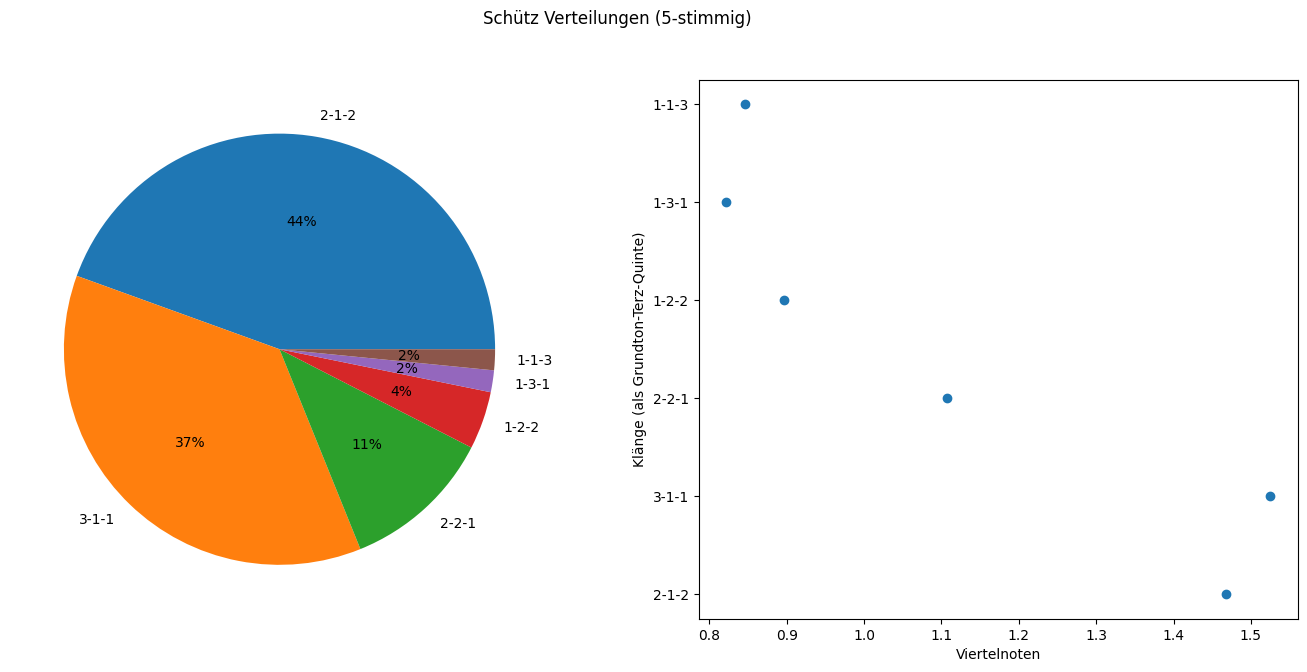

In [7]:
Hlabels = [label for label in overViewHPie]

myHlabels = []

for item in Hlabels:
    item = item.replace("[", "")
    item = item.replace("]", "")
    item = item.replace(".0", "")
    item = item.replace(", ", "-")
    myHlabels.append(item)
print(myHlabels)

figH, (HP1, HP2) = plt.subplots(1, 2)
figH.suptitle("Schütz Verteilungen (5-stimmig)")
figH.set_figwidth(17)
figH.set_figheight(7)

data5HeinPie = [value for key, value in overViewHPie.items()]
HP1.pie(data5HeinPie, labels=myHlabels, autopct="%1.0f%%")
HP1.plot()

for key, val in overViewH.items():
    overViewHScatter[key] = overViewH[key][1] / overViewH[key][0]

data5HeinScatter = [value for key, value in overViewHScatter.items()]
HP2.scatter(data5HeinScatter, myHlabels)
HP2.set_xlabel("Viertelnoten")
HP2.set_ylabel("Klänge (als Grundton-Terz-Quinte)")
HP2.plot()
mpl.style.use('default')

plt.show()

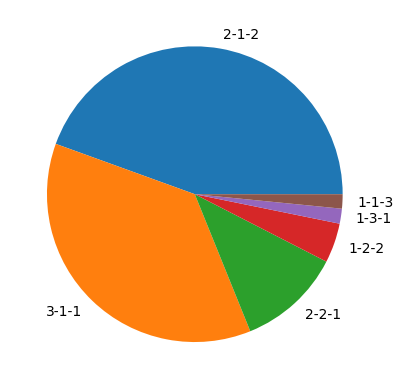

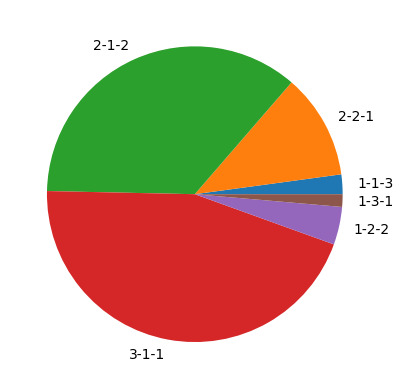

In [9]:
#Vgl
plt.pie(data5HeinPie, labels=myHlabels, autopct="%1.0f%%")
plt.show()

plt.pie(data5JohPie, labels=myJlabels, autopct="%1.0f%%")
plt.show()
